In [1]:
import numpy as np


In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [4]:
import pandas_datareader as data

In [6]:
!pip install yfinance


In [33]:
import yfinance as yf

# Define the stock symbol, start, and end dates
symbol = 'AAPL'
start = '2015-01-01'
end = '2024-12-31'

# Fetch data using yfinance
df = yf.download(symbol, start=start, end=end)

# Display the first few rows of the dataframe
df.head()


[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,27.847500,27.860001,26.837500,27.332500,24.435272,212818400
2015-01-05,27.072500,27.162500,26.352501,26.562500,23.746885,257142000
2015-01-06,26.635000,26.857500,26.157499,26.565001,23.749121,263188400
2015-01-07,26.799999,27.049999,26.674999,26.937500,24.082138,160423600
2015-01-08,27.307501,28.037500,27.174999,27.972500,25.007431,237458000


In [34]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-06-10,196.899994,197.300003,192.149994,193.119995,193.119995,97262100
2024-06-11,193.649994,207.160004,193.630005,207.149994,207.149994,172373300
2024-06-12,207.369995,220.199997,206.899994,213.070007,213.070007,198134300
2024-06-13,214.740005,216.750000,211.600006,214.240005,214.240005,97862700
2024-06-14,213.850006,215.169998,211.300003,212.490005,212.490005,69175600


In [35]:
df=df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-02,27.847500,27.860001,26.837500,27.332500,24.435272,212818400
1,2015-01-05,27.072500,27.162500,26.352501,26.562500,23.746885,257142000
2,2015-01-06,26.635000,26.857500,26.157499,26.565001,23.749121,263188400
3,2015-01-07,26.799999,27.049999,26.674999,26.937500,24.082138,160423600
4,2015-01-08,27.307501,28.037500,27.174999,27.972500,25.007431,237458000


In [36]:
df=df.drop(['Date','Adj Close'],axis=1)
df.head()

,Open,High,Low,Close,Volume
0,27.847500,27.860001,26.837500,27.332500,212818400
1,27.072500,27.162500,26.352501,26.562500,257142000
2,26.635000,26.857500,26.157499,26.565001,263188400
3,26.799999,27.049999,26.674999,26.937500,160423600
4,27.307501,28.037500,27.174999,27.972500,237458000


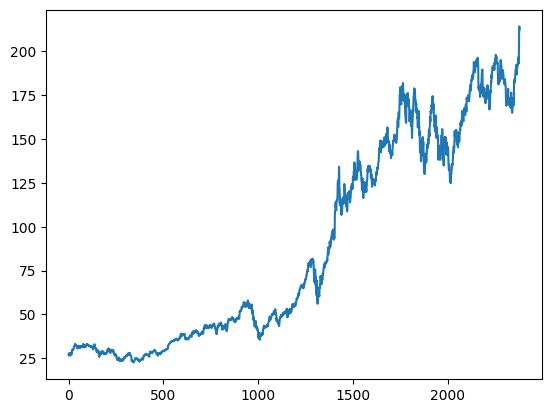

In [37]:
plt.plot(df.Close)

In [38]:
df

,Open,High,Low,Close,Volume
0,27.847500,27.860001,26.837500,27.332500,212818400
1,27.072500,27.162500,26.352501,26.562500,257142000
2,26.635000,26.857500,26.157499,26.565001,263188400
3,26.799999,27.049999,26.674999,26.937500,160423600
4,27.307501,28.037500,27.174999,27.972500,237458000
...,...,...,...,...,...
2374,196.899994,197.300003,192.149994,193.119995,97262100
2375,193.649994,207.160004,193.630005,207.149994,172373300
2376,207.369995,220.199997,206.899994,213.070007,198134300
2377,214.740005,216.750000,211.600006,214.240005,97862700


In [39]:
ma100=df.Close.rolling(100).mean()
ma100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
2374    180.622899
2375    180.808099
2376    181.023199
2377    181.226700
2378    181.399800
Name: Close, Length: 2379, dtype: float64

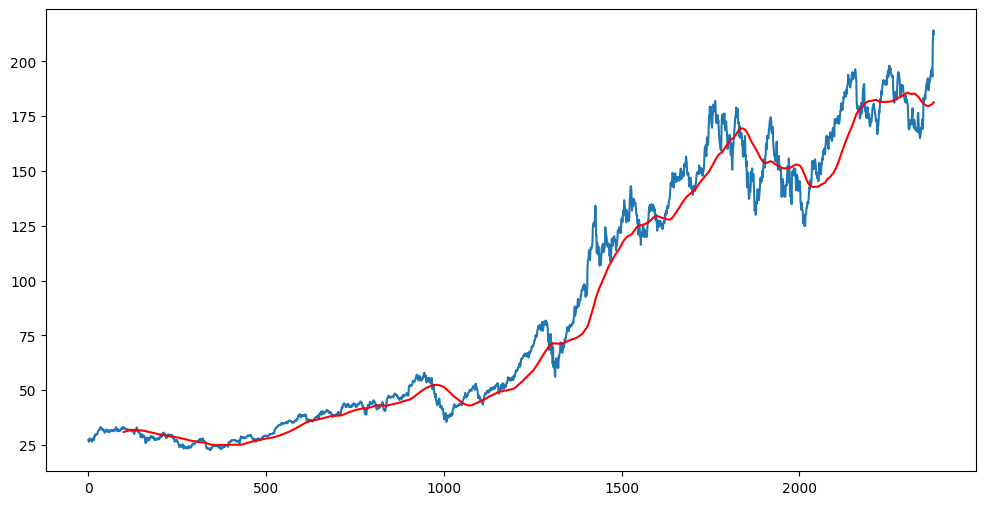

In [40]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

In [41]:
ma200=df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2374    181.78600
2375    181.93985
2376    182.11215
2377    182.28240
2378    182.42425
Name: Close, Length: 2379, dtype: float64

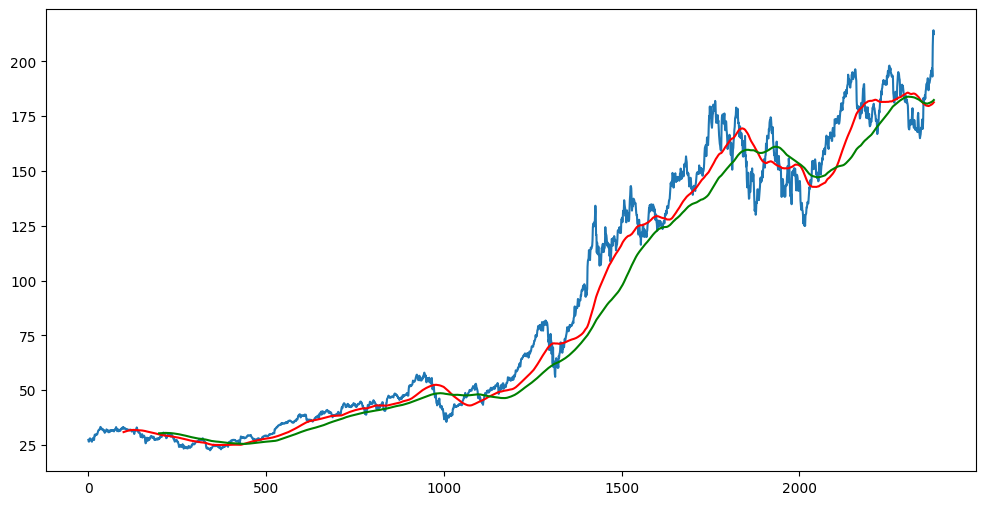

In [42]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [43]:
df.shape

(2379, 5)

In [44]:
#splitting data into 70% training and 30% testing 

data_training=pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing=pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])
print(data_training.shape)
print(data_testing.shape)

(1665, 1)
(714, 1)


In [45]:
data_training.head()

,Close
0,27.332500
1,26.562500
2,26.565001
3,26.937500
4,27.972500


In [46]:
data_testing.head()

,Close
1665,149.100006
1666,151.119995
1667,150.190002
1668,146.360001
1669,146.699997


In [47]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler(feature_range=(0,1))

In [22]:
pip install scikit-learn


In [65]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler(feature_range=(0,1))

In [66]:
data_training_array=scaler.fit_transform(data_training)
data_training_array

array([[0.03751038],
       [0.03142655],
       [0.03144631],
       ...,
       [0.97195127],
       [0.9740055 ],
       [0.99794576]])

In [67]:
x_train=[]
y_train=[]
for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])
    
x_train,y_train=np.array(x_train),np.array(y_train)

In [68]:
pip install tensorflow


Note: you may need to restart the kernel to use updated packages.


In [69]:
from keras.layers import Dense,Dropout,LSTM
from keras.models import Sequential

In [70]:
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Input

model = Sequential()

# Add an Input layer
model.add(Input(shape=(x_train.shape[1], 1)))

# Add LSTM layer
model.add(LSTM(units=50, activation='relu', return_sequences=True))

# Add Dropout layer
model.add(Dropout(0.2))


model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))


model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))


model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))


In [71]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_10 (LSTM)                       │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_11 (LSTM)                       │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_12 (LSTM)                       │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_13 (LSTM)                       │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 120)                 │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 178,640 (697.81 KB)

 Trainable params: 178,640 (697.81 KB)

 Non-trainable params: 0 (0.00 B)

In [72]:
# Check the shapes of x_train and y_train
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)

# Ensure y_train has the shape (number_of_samples, timesteps, 1)
if len(y_train.shape) == 1:
    y_train = y_train.reshape(-1, 1, 1)
elif len(y_train.shape) == 2:
    y_train = y_train.reshape(y_train.shape[0], y_train.shape[1], 1)

# Check the shapes after reshaping
print("Reshaped y_train shape:", y_train.shape)

# Compile and fit the model
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=50)


x_train shape: (1565, 100, 1)
y_train shape: (1565,)
Reshaped y_train shape: (1565, 1, 1)
Epoch 1/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 14s 161ms/step - loss: 598.2838
Epoch 2/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 8s 156ms/step - loss: 45.1179
Epoch 3/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 8s 158ms/step - loss: 0.1320
Epoch 4/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 8s 157ms/step - loss: 0.1336
Epoch 5/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 8s 157ms/step - loss: 0.1219
Epoch 6/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 10s 160ms/step - loss: 0.1165
Epoch 7/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 8s 157ms/step - loss: 0.0985
Epoch 8/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 8s 172ms/step - loss: 0.0868
Epoch 9/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 8s 156ms/step - loss: 0.0895
Epoch 10/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 10s 156ms/step - loss: 0.0909
Epoch 11/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 8s 157ms/step - loss: 0.0833
Epoch 12/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 10s 156ms/step - loss: 0.0782
Epoch 13/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 8s 154ms/step - loss: 0.0830
Epoch 14/50
49/49 ━━━━━━━━━━

In [79]:
model.save('my_model.keras')

In [80]:
data_testing.head()

,Close
1665,149.100006
1666,151.119995
1667,150.190002
1668,146.360001
1669,146.699997


In [81]:
past_100_days = data_training.tail(100)

In [82]:
import pandas as pd

# Assuming past_100_days and data_testing are both DataFrames
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)


In [83]:
final_df.head()

,Close
0,122.540001
1,120.089996
2,120.589996
3,121.209999
4,121.389999


In [86]:

input_data= scaler.fit_transform(final_df)
input_data

array([[0.02798388],
       [0.00201394],
       [0.00731392],
       [0.01388592],
       [0.01579391],
       [0.        ],
       [0.0238499 ],
       [0.03285985],
       [0.06359974],
       [0.0668857 ],
       [0.08479966],
       [0.11087554],
       [0.13885942],
       [0.12020356],
       [0.15401728],
       [0.12857745],
       [0.15475936],
       [0.15115541],
       [0.1583633 ],
       [0.14002542],
       [0.1441594 ],
       [0.12762349],
       [0.15285144],
       [0.15709136],
       [0.15359336],
       [0.14500742],
       [0.14394736],
       [0.12253556],
       [0.13398337],
       [0.08426963],
       [0.0869197 ],
       [0.10430362],
       [0.10928561],
       [0.07366967],
       [0.06370577],
       [0.03042183],
       [0.05374178],
       [0.08002963],
       [0.06752168],
       [0.05246976],
       [0.0507738 ],
       [0.07854564],
       [0.05861775],
       [0.07631966],
       [0.0741997 ],
       [0.07366967],
       [0.05702774],
       [0.049

In [87]:
input_data.shape

(814, 1)

In [105]:
import numpy as np

# Assuming input_data is already defined and has the shape (814, 1)
x_test = []
y_test = []

# Constructing x_test and y_test
for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i, 0])


In [106]:
# Converting to numpy arrays
x_test, y_test = np.array(x_test), np.array(y_test)

# Check shapes
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

x_test shape: (714, 100, 1)
y_test shape: (714,)


In [107]:
#making predictions

# Predicting with the model
y_predicted = model.predict(x_test)

# Check the predicted shape
print("y_predicted shape:", y_predicted.shape)

23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 123ms/step
y_predicted shape: (714, 120)


In [103]:
y_predicted.shape

(714, 120)

In [95]:
y_predicted

array([[0.10825256, 0.11844289, 0.12959966, ..., 0.13281119, 0.12414896,
        0.11648875],
       [0.10925946, 0.1183046 , 0.12888053, ..., 0.13272527, 0.12388807,
        0.11672155],
       [0.11162989, 0.11946089, 0.12890197, ..., 0.13332146, 0.12494255,
        0.11766946],
       ...,
       [0.37882084, 0.38392898, 0.40570894, ..., 0.36810562, 0.37541828,
        0.39681843],
       [0.3802908 , 0.38516176, 0.40770683, ..., 0.3695814 , 0.37649176,
        0.39917088],
       [0.38193598, 0.38654137, 0.40973148, ..., 0.3711622 , 0.37776506,
        0.40152556]], dtype=float32)

In [96]:
scaler.scale_

array([0.01059996])

In [97]:
scale_factor=1/0.01059996
y_predicted=y_predicted*scale_factor
y_test=y_test*scale_factor

In [108]:
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense, Input

model = Sequential()

# Input layer
model.add(Input(shape=(100, 1)))

# LSTM layer
model.add(LSTM(units=50, activation='relu', return_sequences=False))

# Dropout layer
model.add(Dropout(0.2))

# Dense layer (output layer)
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Fit the model (assuming x_train and y_train are already defined)
model.fit(x_train, y_train, epochs=50)

# Predicting with the model
y_predicted = model.predict(x_test)

# Check the predicted shape
print("y_predicted shape:", y_predicted.shape)


Epoch 1/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 9s 74ms/step - loss: 0.0546
Epoch 2/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 5s 72ms/step - loss: 0.0036
Epoch 3/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 5s 72ms/step - loss: 0.0029
Epoch 4/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step - loss: 0.0025
Epoch 5/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 77ms/step - loss: 0.0026
Epoch 6/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - loss: 0.0024
Epoch 7/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 77ms/step - loss: 0.0025
Epoch 8/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 76ms/step - loss: 0.0021
Epoch 9/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 75ms/step - loss: 0.0022
Epoch 10/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - loss: 0.0021
Epoch 11/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step - loss: 0.0020
Epoch 12/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 80ms/step - loss: 0.0019
Epoch 13/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 78ms/step - loss: 0.0023
Epoch 14/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 83ms/step - loss: 0.0021
Epoch 15/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 5s 76ms/step - loss: 0.0017
Epoc

In [111]:
model.save('my_model.keras')

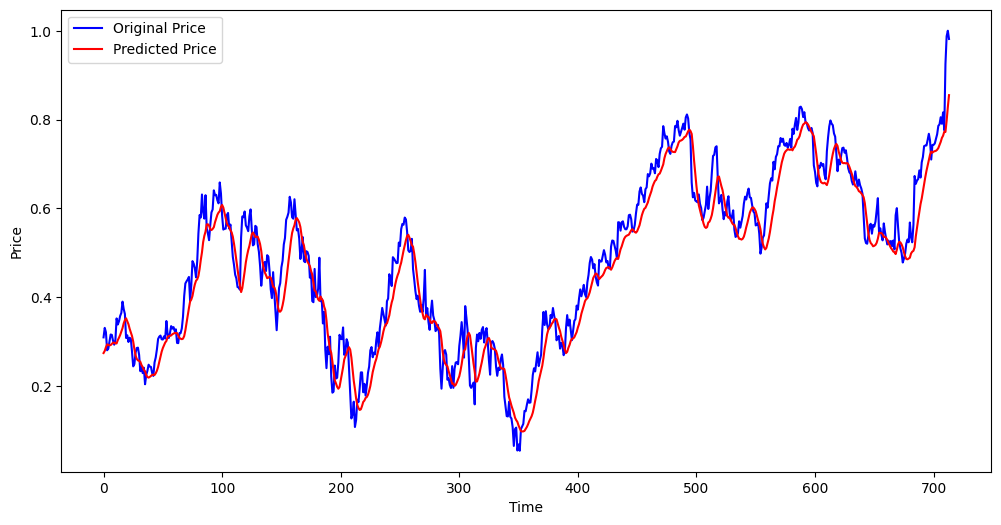

In [110]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label='Original Price')
plt.plot(y_predicted,'r',label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()